In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df = pd.read_csv('stockdata1.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2020-09-11,207.199997,208.630005,201.240005,204.029999,202.174850,33620100,MSFT
1,2020-09-14,204.240005,209.199997,204.029999,205.410004,203.542297,30375800,MSFT
2,2020-09-15,208.419998,209.779999,206.929993,208.779999,206.881653,21823900,MSFT
3,2020-09-16,210.619995,210.649994,204.639999,205.050003,203.185562,26328100,MSFT
4,2020-09-17,200.050003,204.330002,199.960007,202.910004,201.065033,34011300,MSFT
...,...,...,...,...,...,...,...,...
247,2021-09-03,300.989990,302.600006,300.260010,301.140015,301.140015,14747900,MSFT
248,2021-09-07,301.010010,301.089996,298.200012,300.179993,300.179993,17180400,MSFT
249,2021-09-08,299.779999,300.609985,297.470001,300.209991,300.209991,15046800,MSFT
250,2021-09-09,300.820007,302.140015,297.000000,297.250000,297.250000,19927000,MSFT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
 7   Ticker     252 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 15.9+ KB


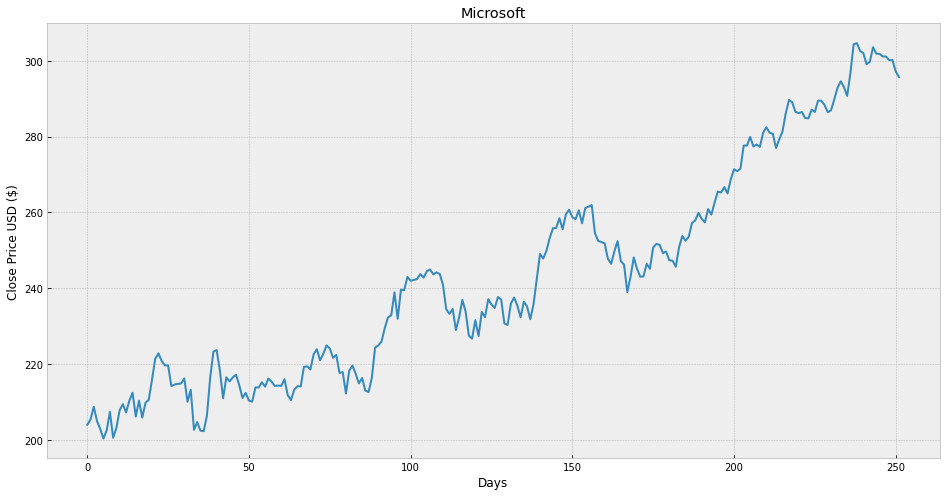

In [5]:
plt.figure(figsize=(16,8))
plt.title('Microsoft')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [6]:
df = df[['Close']]
df.head(4)

,Close
0,204.029999
1,205.410004
2,208.779999
3,205.050003


In [7]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#creare a new column (target) shifted 'x' units/days up
df['Prediction']= df[['Close']].shift(-future_days)
df.tail(4)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
248,300.179993,NaN
249,300.209991,NaN
250,297.250000,NaN
251,295.709991,NaN


In [8]:
#create the feature data set (x) and convert it into numpy array and remove the last 'x' rows/days
x = np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

[[204.02999878]
 [205.41000366]
 [208.77999878]
 [205.05000305]
 [202.91000366]
 [200.38999939]
 [202.53999329]
 [207.41999817]
 [200.58999634]
 [203.19000244]
 [207.82000732]
 [209.44000244]
 [207.25999451]
 [210.33000183]
 [212.46000671]
 [206.19000244]
 [210.38000488]
 [205.91000366]
 [209.83000183]
 [210.58000183]
 [215.80999756]
 [221.3999939 ]
 [222.86000061]
 [220.86000061]
 [219.66000366]
 [219.66000366]
 [214.22000122]
 [214.6499939 ]
 [214.80000305]
 [214.88999939]
 [216.22999573]
 [210.08000183]
 [213.25      ]
 [202.67999268]
 [204.72000122]
 [202.47000122]
 [202.33000183]
 [206.42999268]
 [216.38999939]
 [223.28999329]
 [223.72000122]
 [218.38999939]
 [211.00999451]
 [216.55000305]
 [215.44000244]
 [216.50999451]
 [217.22999573]
 [214.46000671]
 [211.08000183]
 [212.41999817]
 [210.38999939]
 [210.11000061]
 [213.86000061]
 [213.86999512]
 [215.22999573]
 [214.07000732]
 [216.21000671]
 [215.36999512]
 [214.24000549]
 [214.36000061]
 [214.28999329]
 [216.00999451]
 [211.80

In [9]:
#create the target data set (y) and convert it into numpy array and get all the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[219.66000366 214.22000122 214.6499939  214.80000305 214.88999939
 216.22999573 210.08000183 213.25       202.67999268 204.72000122
 202.47000122 202.33000183 206.42999268 216.38999939 223.28999329
 223.72000122 218.38999939 211.00999451 216.55000305 215.44000244
 216.50999451 217.22999573 214.46000671 211.08000183 212.41999817
 210.38999939 210.11000061 213.86000061 213.86999512 215.22999573
 214.07000732 216.21000671 215.36999512 214.24000549 214.36000061
 214.28999329 216.00999451 211.80000305 210.52000427 213.25999451
 214.19999695 214.13000488 219.27999878 219.41999817 218.58999634
 222.58999634 223.94000244 221.02000427 222.75       224.96000671
 224.1499939  221.67999268 222.41999817 217.69000244 217.8999939
 212.25       218.28999329 219.61999512 217.49000549 214.92999268
 216.33999634 213.02000427 212.6499939  216.44000244 224.33999634
 224.97000122 225.94999695 229.52999878 232.33000183 232.8999939
 238.92999268 231.96000671 239.6499939  239.50999451 243.
 242.00999451 242.19

In [10]:
#split the data into 75% training and 25% testing
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25)

In [11]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [13]:
#get the last 'x' rows of the feaututre data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[271.6000061 ],
       [277.6499939 ],
       [277.66000366],
       [279.92999268],
       [277.42001343],
       [277.94000244],
       [277.32000732],
       [280.98001099],
       [282.51000977],
       [281.02999878],
       [280.75      ],
       [277.01000977],
       [279.32000732],
       [281.3999939 ],
       [286.14001465],
       [289.67001343],
       [289.04998779],
       [286.54000854],
       [286.22000122],
       [286.5       ],
       [284.91000366],
       [284.82000732],
       [287.11999512],
       [286.51000977],
       [289.51998901]])

In [15]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[289.45999146 288.32998657 288.32998657 302.61999512 289.80999756
 292.8500061  294.6000061  293.07998657 302.01000977 296.76998901
 304.35998535 304.6499939  302.61999512 302.01000977 299.08999634
 295.70999146 303.58999634 301.88000488 301.82998657 301.1499939
 301.14001465 301.14001465 300.20999146 297.25       295.70999146]

[284.19443272 290.79492257 290.80584314 293.28238358 290.54401565
 291.11131964 290.43490977 294.42794543 296.09716225 294.48248172
 294.17700522 290.09670483 292.61689429 294.88614353 300.05746947
 303.90867081 303.23222764 300.49385972 300.1447342  300.4502107
 298.71553701 298.6173517  301.12662058 300.46113128 303.74499534]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


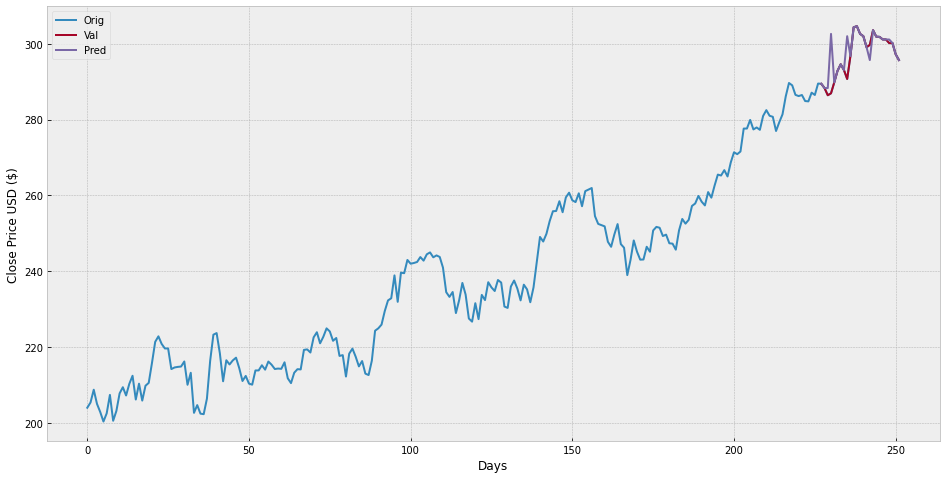

In [16]:
#visualize the data
predictions =tree_prediction

valid =df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


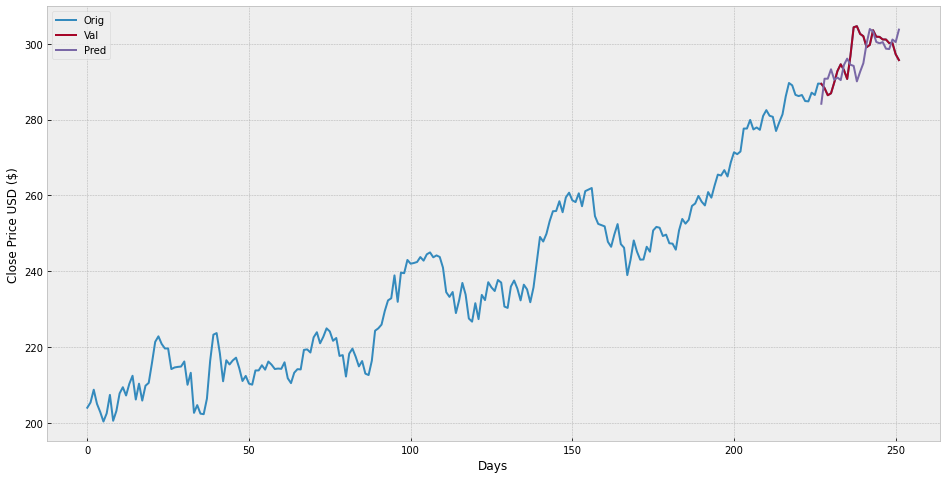

In [17]:
#visualize the data
predictions =lr_prediction

valid =df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()